# Fancy Indexing

Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars. This allows us to very quickly access and modify complicated subsets of an array's values.

## Exploring Fancy Indexing

Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once. For example, consider the following array:

In [2]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [3]:
# access three different elements
[x[3], x[7], x[2]]

[71, 86, 14]

In [7]:
# fancy indexing
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

When using fancy indexing, the shape of the result reflects the shape of the index arrays rather than the shape of the array being indexed:

In [6]:
ind = np.array([[3, 7],
                [4, 5]])

x[ind]

array([[71, 86],
       [60, 20]])

In [8]:
# Facy indexing with multiple dimensions
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [14]:
print(row[:, np.newaxis], col)
# Follows broadcasting rules
print(X[row[:, np.newaxis], col])

[[0]
 [1]
 [2]] [2 1 3]
[[ 2  1  3]
 [ 6  5  7]
 [10  9 11]]


In [15]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

## Combined Indexing

For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

In [16]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [18]:
# We can combine fancy and simple indices:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [19]:
# We can also combine fancy indexing with slicing:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [20]:
# We can combine fancy indexing with masking:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

## Example: Selecting Random Points

One common use of fancy indexing is the selection of subsets of rows from a matrix. For example, we might have an N by D matrix represnting N points in D dimensions, such as the following points drawn from a two-dimensional normal distribution:

In [21]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

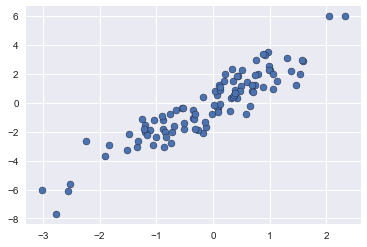

In [23]:
# Visualize above
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:, 0], X[:, 1], edgecolor = 'black')

Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

In [24]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([98, 89, 68, 77, 10, 42, 95, 93, 51, 53, 59, 15, 46, 13, 65, 38, 70,
        9, 47, 88])

In [25]:
selection = X[indices] # fancy indexing here
selection.shape

(20, 2)

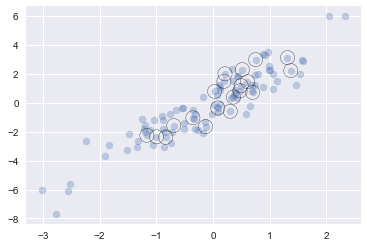

In [36]:
# Plot them
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
           facecolor='none', s=200, edgecolor='black')

## Modifying Values with Fancy Indexing

Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array. For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

In [37]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


In [38]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

In [39]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [40]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [41]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


## Example: Binning Data

You can use these ideas to efficiently bin data to create a histogram by hand. For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins. We could compute it using ufunc.at like this:

In [46]:
np.random.seed(42)
x = np.random.randn(100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


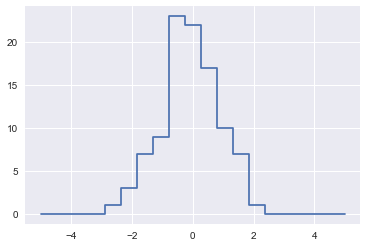

In [47]:
# plot the results
plt.plot(bins, counts, linestyle='steps');

In [48]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
56 µs ± 1.78 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
14.6 µs ± 280 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [49]:
np.histogram??

In [50]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
73.6 ms ± 1.48 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
124 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
